In [ ]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
 # importing lasso regression too
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA




In [ ]:
# LOADING DATASET
test_df = pd.read_csv("/content/test.csv")
test_df.head(5)
train_df = pd.read_csv("/content/train.csv")
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# New Section

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dummies = pd.get_dummies(train_df.Embarked)
dummies.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
dummies_ = pd.concat([train_df, dummies], axis = 1)

train_df = dummies_.drop(columns = ["Embarked", "S"], axis = 1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0


In [ ]:
train_df.isnull().sum()
train_df["Age"].isnull().value_counts()


False    714
True     177
Name: Age, dtype: int64

<Axes: >

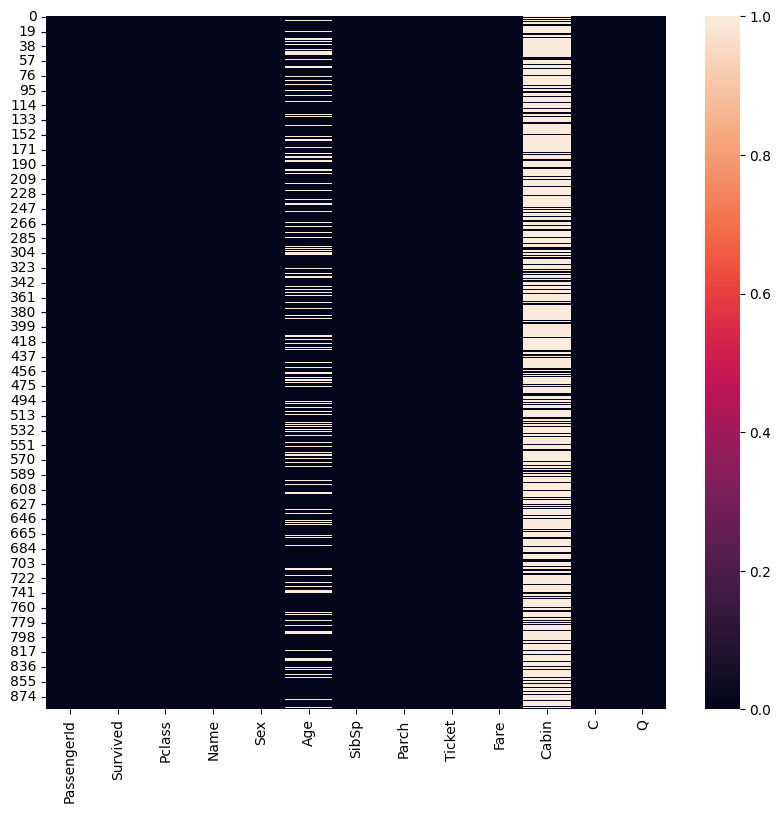

In [ ]:
plt.figure(figsize = (10, 9))
sns.heatmap(train_df.isnull())

In [ ]:
percent_error = train_df.isnull().sum() / train_df.shape[0] * 100
percent_error

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
C               0.000000
Q               0.000000
dtype: float64

In [ ]:
train_cleaned = train_df.drop(columns = "PassengerId", axis = 1)
train_cleaned.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0


<Axes: >

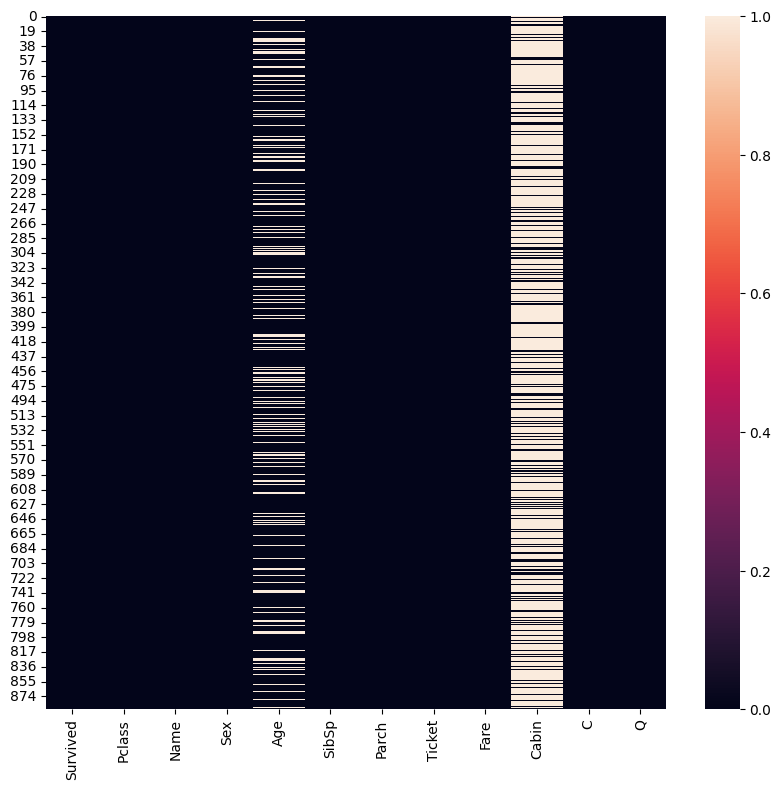

In [ ]:
plt.figure(figsize = (10, 9))
sns.heatmap(train_cleaned.isnull())

<Axes: >

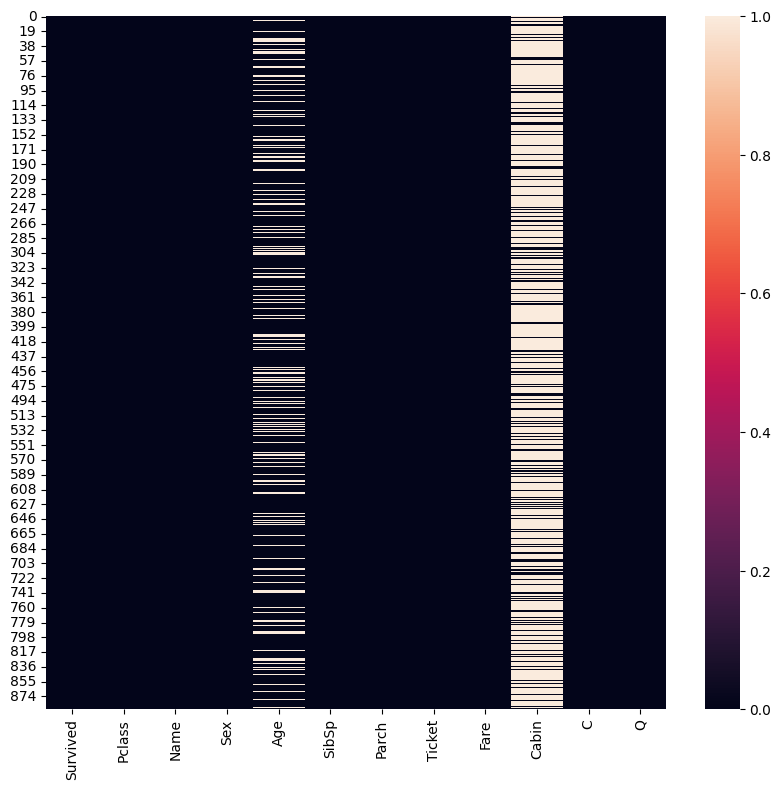

In [ ]:
plt.figure(figsize = (10,9))
sns.heatmap(train_cleaned.isnull())

In [ ]:
cleaned_train_df = train_cleaned.drop(columns = ["Cabin", "Name", "Ticket"],axis = 1)
cleaned_train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,0,3,male,22.0,1,0,7.2500,0,0
1,1,1,female,38.0,1,0,71.2833,1,0
2,1,3,female,26.0,0,0,7.9250,0,0
3,1,1,female,35.0,1,0,53.1000,0,0
4,0,3,male,35.0,0,0,8.0500,0,0


In [ ]:

def sex_num(cleaned_train_df, colname):
    def sex(x):
        if x=='male':
            return 1
        return 0

    return cleaned_train_df[colname].apply(sex)

cleaned_train_df['SexNumerical'] = sex_num(cleaned_train_df, 'Sex')






In [ ]:
dict1 = dict(cleaned_train_df["Age"])
list1 = list(cleaned_train_df["Age"])
dict1
list1
null = cleaned_train_df[cleaned_train_df.isnull().any(axis = 1)]

null.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,SexNumerical
5,0,3,male,NaN,0,0,8.4583,0,1,1
17,1,2,male,NaN,0,0,13.0000,0,0,1
19,1,3,female,NaN,0,0,7.2250,1,0,0
26,0,3,male,NaN,0,0,7.2250,1,0,1
28,1,3,female,NaN,0,0,7.8792,0,1,0


<ipython-input-16-cdcb25872ece>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_train_df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

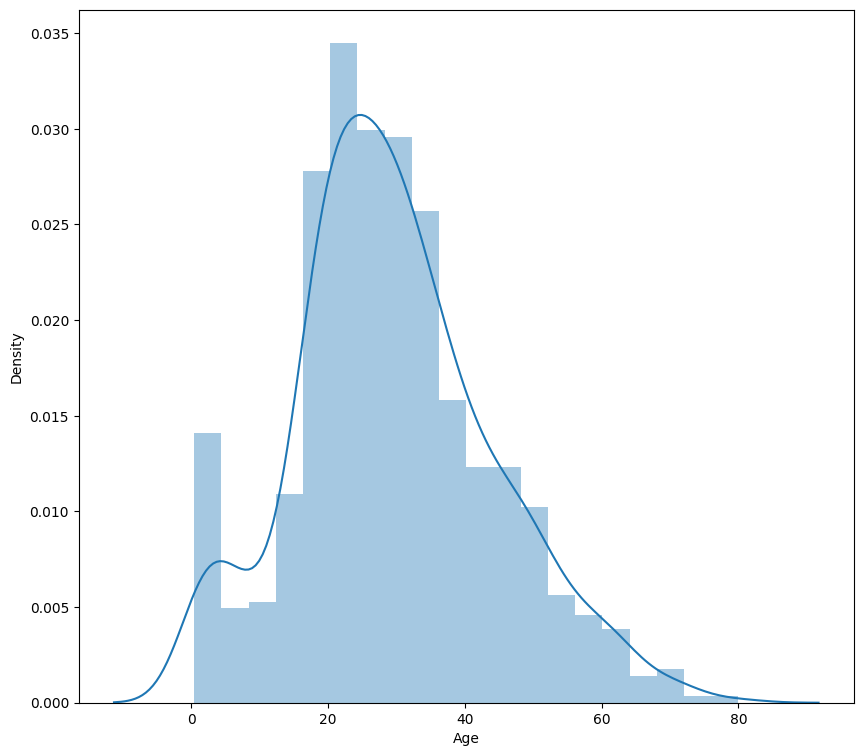

In [ ]:
plt.figure(figsize = (10,9))
sns.distplot(cleaned_train_df["Age"])

In [ ]:
mean_cleaned = cleaned_train_df.fillna(cleaned_train_df.mean())
mean_cleaned.isnull().sum()
mean_cleaned.isnull().sum().sum()

<ipython-input-17-a2f16a72e68d>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_cleaned = cleaned_train_df.fillna(cleaned_train_df.mean())


0

<ipython-input-18-ebda09fc45b5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_cleaned["Age"], bins = 20,kde_kws = {"linewidth" : 8, "color" : "red"}, label = "Cleaned")
<ipython-input-18-ebda09fc45b5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_train_df["Age"], bins = 20, kd

<Axes: xlabel='Age', ylabel='Density'>

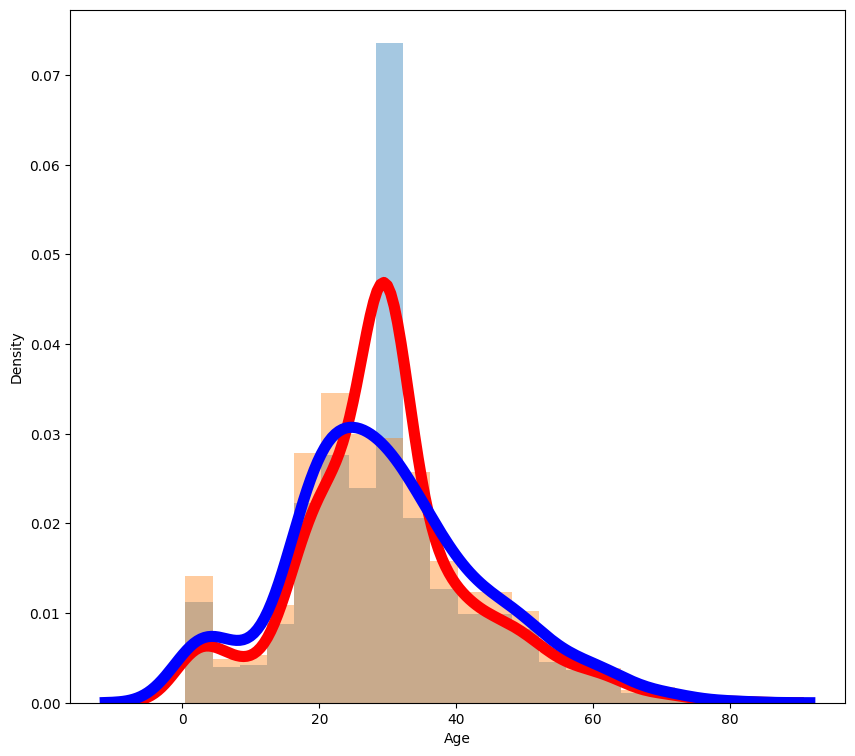

In [ ]:
plt.figure(figsize = (10,9))
sns.distplot(mean_cleaned["Age"], bins = 20,kde_kws = {"linewidth" : 8, "color" : "red"}, label = "Cleaned")
sns.distplot(cleaned_train_df["Age"], bins = 20, kde_kws = {"linewidth" : 8, "color" : "blue"}, label = "Normal")

<Axes: >

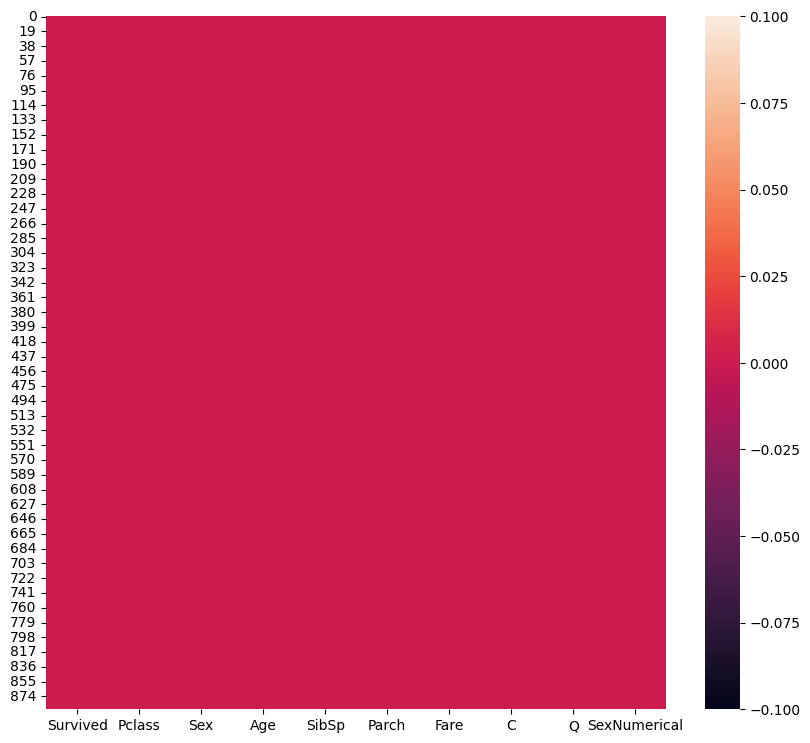

In [ ]:
plt.figure(figsize = (10, 9))
sns.heatmap(mean_cleaned.isnull())

In [ ]:
mean_cleaned.drop(columns = "Sex", axis = 1, inplace = True)

In [ ]:
X = mean_cleaned.drop(columns = "Survived", axis = 1)
y = mean_cleaned["Survived"]
print(X.shape)
print(y.shape)

(891, 8)
(891,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)


StandardScaler()

In [ ]:
print(sc.mean_.round(2))
print(sc.scale_.round(2))

[ 2.3  29.77  0.53  0.41 32.29  0.2   0.1   0.64]
[ 0.84 12.71  1.13  0.84 48.63  0.4   0.29  0.48]


In [ ]:
sc.transform(X_train).round(2)
sc.transform(X_test).round(2)

array([[-1.55,  0.96, -0.47, ..., -0.5 , -0.32,  0.74],
       [ 0.83, -0.69, -0.47, ..., -0.5 , -0.32,  0.74],
       [-0.36, -0.45,  0.42, ..., -0.5 , -0.32, -1.35],
       ...,
       [ 0.83, -0.01,  6.64, ..., -0.5 , -0.32,  0.74],
       [ 0.83, -0.3 , -0.47, ..., -0.5 , -0.32,  0.74],
       [ 0.83, -0.06,  0.42, ..., -0.5 , -0.32, -1.35]])

In [ ]:
from sklearn.linear_model import LinearRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_train_prediction = model.predict(X_train)
y_train_prediction = (y_train_prediction > 0.5).astype(int)  # Assuming binary classification with threshold 0.5

accuracy = accuracy_score(y_train, y_train_prediction)
accuracy

0.8103932584269663